# Title: Heart Disease Prediction
`Author`: [Summaiya Zafar](https://www.linkedin.com/in/summaiya-zafar-285350382/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3Bb0sWnQC6Qii0Vk6SWiheOA%3D%3D)\
`Date`: 24.Oct.2025\
`Dataset`:[Heart disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([
     1. typical angina
     2. atypical angina
     3. non-anginal
     4. asymptomatic])
* `trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpea`k: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989)
* International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aim and Objectives:
We will fill after doing some Exploratory Data Analysis (EDA).

### Import Libraries:
Let's start the project by importing that we will need in this project.

In [89]:
# import libraries
import pandas as pd
import numpy as np

# To Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Imute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For classification Tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Load the data from csv file placed locally in our pc
df= pd.read_csv('./heart_disease_uci.csv')

# print the first 5 rowa of the DataFrame
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA):

### Explore each Column

In [91]:
# Exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [92]:
# Data shape
df.shape

(920, 16)

In [93]:
# id column
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

In [94]:
# age column
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

<Axes: xlabel='age', ylabel='Count'>

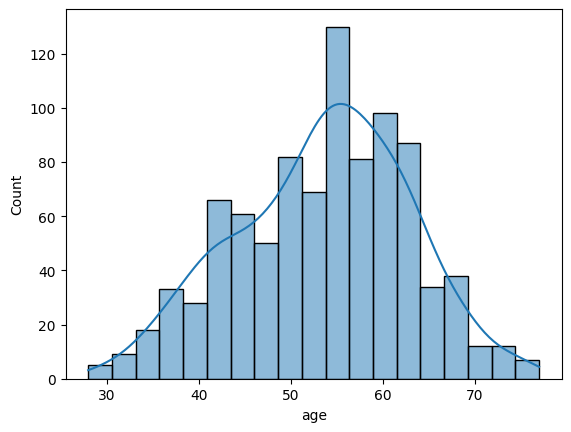

In [95]:
# draw a histrogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


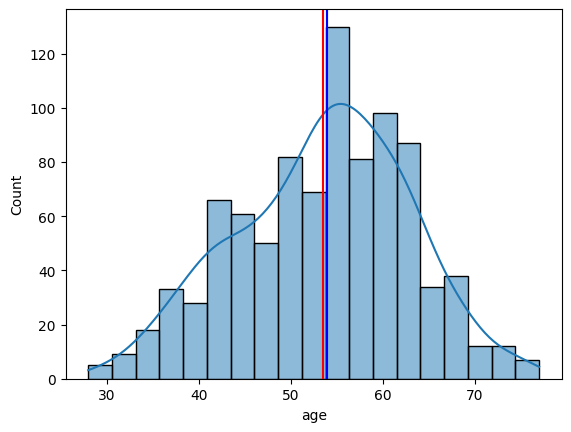

In [96]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])


### Let's explore the gender based distribution of the dataset for age colummn.

In [97]:
# plot the histrogram of age column using plotly and coloring this by sex.
fig= px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [98]:
# find the values of sex columns
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [99]:
# Calculate the percentages of male and female value counts in the data
male_count= 726
female_count= 194
total_count= male_count + female_count

# Calculate the percentage
percentage_male= male_count/ total_count * 100
percentage_female= female_count/ total_count * 100

# Display the data
print(f'Male percentage in the data: {percentage_male}%')
print(f'Female percentage in the data: {percentage_female}%')

# Difference 
difference_percentage= percentage_male - percentage_female
print(f"Male percentage are more {difference_percentage}% then female.")

Male percentage in the data: 78.91304347826087%
Female percentage in the data: 21.086956521739133%
Male percentage are more 57.82608695652174% then female.


In [100]:
# Find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [101]:
# Let's deal with dataset column
# find the unique values in dataset column.
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [102]:
# Check the value count of dataset
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


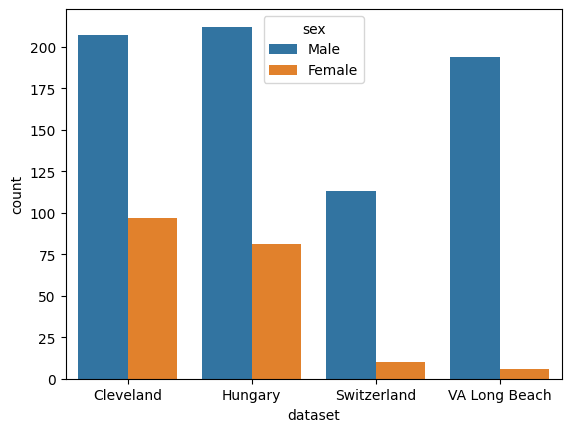

In [103]:
# plot the countable of dataset column
sns.countplot(data=df, x='dataset', hue='sex')

# Make a plot using plotly
fig= px.bar(df, x='dataset', color= 'sex')
fig.show()

# print the values count of dataset column groupby by sex
print(df.groupby('sex')['dataset'].value_counts())

In [104]:
# Make a plot of age column using plotly and coloring this by dataset column
fig= px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# Print the mean, median and mode of age column grouped by dataset column
print(f"Mean of Dataset: {df.groupby('dataset')['age'].median()}")
print("----------------------------------")
print(f"Median of Dataset: {df.groupby('dataset')['age'].median()}")
print("----------------------------------")
print(f"Mode of Dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("----------------------------------")

Mean of Dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------
Median of Dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------
Mode of Dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------


### Let's explore cp (Chest Pain) column:

In [105]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

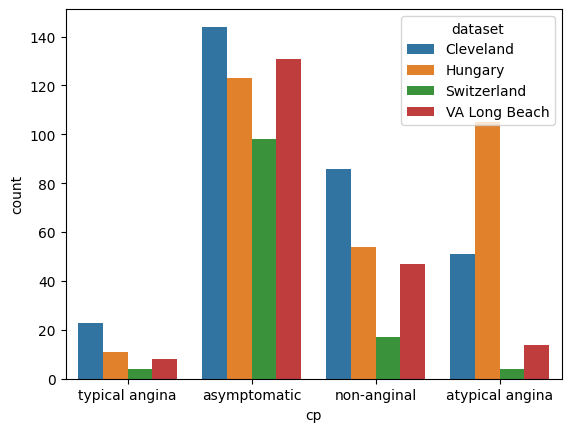

In [106]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [107]:
# Draw the plot of age column grouped by cp column using plotly
fig= px.histogram(data_frame=df, x='age', color='cp')
fig.show()

### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

` Write here, what will happen if the blood presure is high or low and then you can bin the data based on those values.`

In [108]:
# Find the value colunt of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

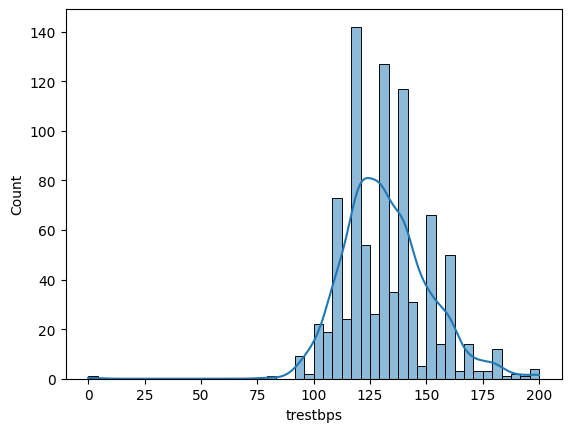

In [109]:
# Create a trestbps histplot column:
sns.histplot(df['trestbps'], kde=True)

<span style='color: yellow; font-size: 250%; font-weight: bold;'>Dealing with missing values</span>

### We are going to make a function to deal with missing values.

In [110]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols= df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [111]:
# find only categorical columns:
cat_cols= df.select_dtypes(include='object').columns.tolist()
# find only numerical columns:
num_col= df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_col}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [112]:
# Deal with missing values in trestbps column
# Find the percentage of tje missing values in trestbps column
print(f'Percentage of missing values of the trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%')

Percentage of missing values of the trestbps column: 6.41%


### Let's impute the missing values in the thal column by using ML Model.

In [60]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [114]:
categorical_cols= ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bool_cols= ['fbs', 'exang']
numerical_cols= ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [115]:
# Define the function to impute the missing values in thal column
def impute_categorical_missing_data(passed_col):

    df_null= df[df[passed_col].isnull()]
    df_not_null= df[df[passed_col].notnull()]

    X= df_not_null.drop(passed_col, axis=1)
    y= df_not_null[passed_col]

    other_missing_cols= [col for col in missing_data_cols if col != passed_col]

    label_encoder= LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer= IterativeImputer(estimator=RandomForestClassifier(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values= X[col].values.reshape(-1, 1)
            imputed_values= iterative_imputer.fit_transform(col_with_missing_values)
            X[col]= imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=20, random_state=42)

    rf_classifier= RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred= rf_classifier.predict(X_test)

    acc_score= accuracy_score(y_test, y_pred)

    print('The feature' + passed_col+ 'has been imputed with', round((acc_score * 100), 2), 'acc')

    X= df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values= X[col].values.reshape(-1, 1)
            imputed_values= iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col]= rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col]= df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined= pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    df_null= df[df[passed_col].isnull()]
    df_not_null= df[df[passed_col].notnull()]

    X= df_not_null.drop(passed_col, axis=1)
    y= df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder= LabelEncoder()
    
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col]= label_encoder.fit_transform(X[col])
    
    iterative_imputer= IterativeImputer(estimator=RandomForestClassifier(random_state=42), add_indicator=True)
            
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values= X[col].values.reshape(-1, 1)
            imputed_values= iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=20, random_state=42)

    rf_regressor =RandomForestRegressor() 

    rf_regressor.fit(X_train, y_train)

    y_pred= rf_regressor.predict(X_test)

    print('MAE= ', mean_absolute_error(y_test, y_pred), '\n')
    print('MSE= ', mean_squared_error(y_test, y_pred), '\n')

    X= df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col]= label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values= X[col].values.reshape(-1, 1)
            imputed_values= iterative_imputer.fit_transform(col_with_missing_values)
            X[col]= imputed_values[:, 0]
        else:
            pass
        
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined= pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [116]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

In [117]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print('Missing Values', col, ':', str(round((df[col].isnull().sum() / len(df)) * 100 , 2)) +'%')
    if col in categorical_cols:
        df[col]= impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE=  13.501499999999997 

MSE=  256.714585 

Missing Values chol : 3.26%
MAE=  44.2425 

MSE=  4186.392445 

Missing Values fbs : 9.78%
The featurefbshas been imputed with 80.0 acc
Missing Values restecg : 0.22%
The featurerestecghas been imputed with 65.0 acc
Missing Values thalch : 5.98%
MAE=  17.319000000000003 

MSE=  484.00876000000005 

Missing Values exang : 5.98%
The featureexanghas been imputed with 70.0 acc
Missing Values oldpeak : 6.74%
MAE=  0.40535 

MSE=  0.32223604999999994 

Missing Values slope : 33.59%
The featureslopehas been imputed with 70.0 acc
Missing Values ca : 66.41%
The featurecahas been imputed with 70.0 acc
Missing Values thal : 52.83%
The featurethalhas been imputed with 85.0 acc


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [119]:
# Let's impute other column with missing values
round(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [120]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [122]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [123]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Outputs:
1. The minimum to maximum age to have a heart disease starts from 28 to 77 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get heart disease at the age of 54- 55 years.
4. Male percentage in the data: 78.91304347826087%
5. Female percentage in the data: 21.086956521739133%
6. Male percentage are more 57.82608695652174% then female.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are frim Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of females in this dataset are frim  Hungary (212) and lowest from  Switzerland (113).
8. `Write down the observation here about mean, median and mode of age column, groupedmby the dataset column.`
9. `Write down the observation from cp column here.`
10. `Write down the steps of imputing missing values and why did you choose those steps?`
11. `How did you deal with outliers, write the information step by step.`
12. `Explore all other columns and write their outputs.`

<span style='color: yellow; font-size: 250%; font-weight: bold;'>Dealing with outliers</span>

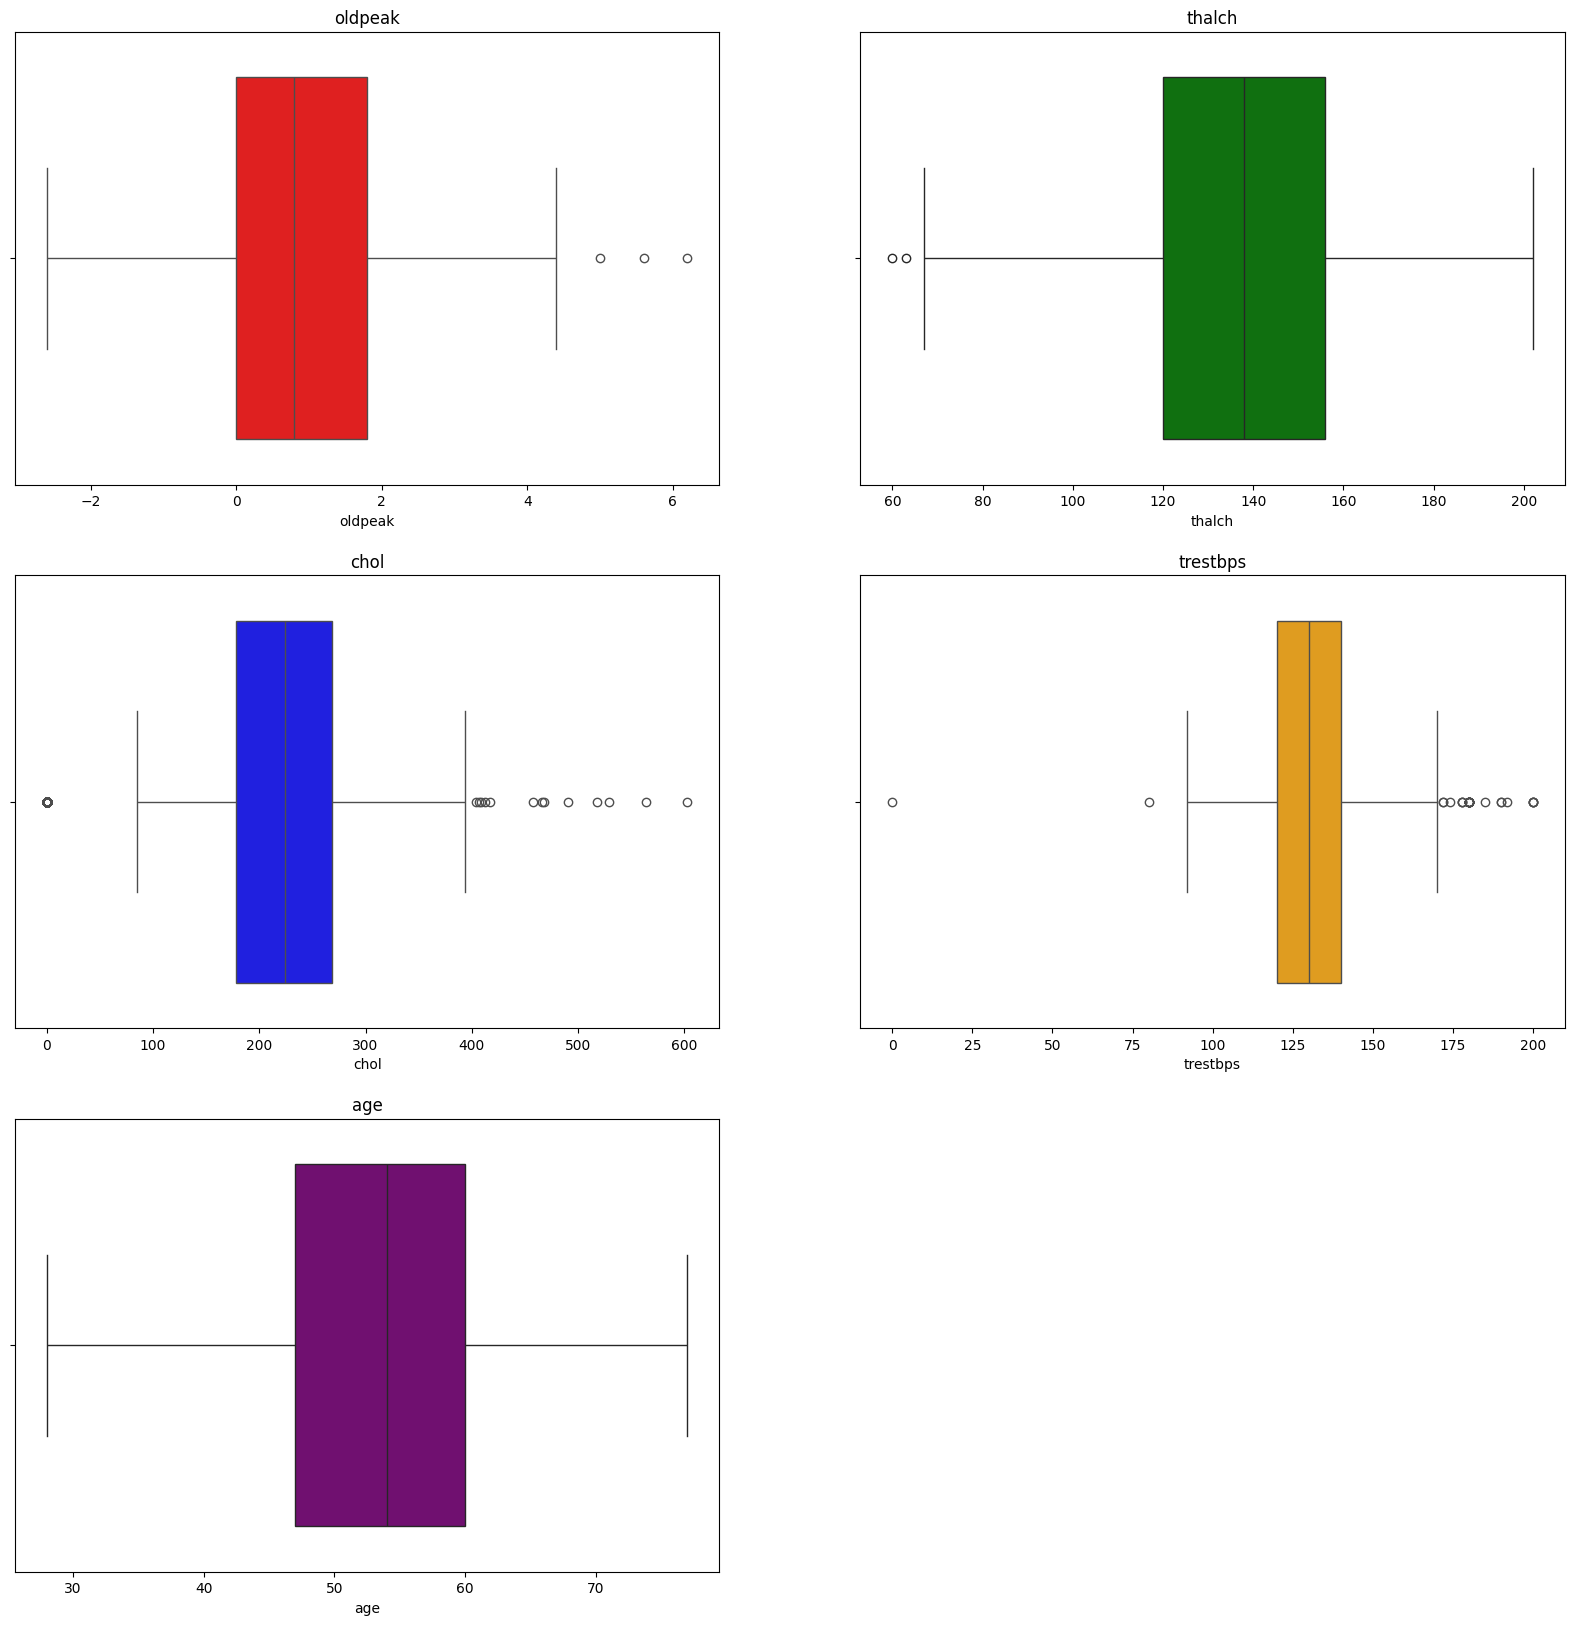

In [ ]:
# Create bos plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors= ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x= df[col], color= colors[i])
    plt.title(col)

plt.show()

In [133]:
# make box plots of all the numeric columns using for loop and plotly
fig= px.box(data_frame=df, y='age')
fig.show()

fig= px.box(data_frame=df, y='trestbps')
fig.show()

fig= px.box(data_frame=df, y='chol')
fig.show()

fig= px.box(data_frame=df, y='thalch')
fig.show()

fig= px.box(data_frame=df, y='oldpeak')
fig.show()


In [131]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]

# remove this row from data
df= df[df['trestbps'] != 0]

In [134]:
# print the row from df where chol is 0
df[df['chol'] ==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,128.63,0.0,False,normal,130.00,True,1.161,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.0,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,136.62,0.0,False,lv hypertrophy,124.20,True,1.901,flat,1.0,reversable defect,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


<span style='color: yellow; font-size: 250%; font-weight: bold;'>Machine Learning:</span>

In [135]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [136]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64